In this post, we'll have a look at stereograms, in particular [autostereograms](https://en.wikipedia.org/wiki/Autostereogram). We'll start with a simple pattern and shift it to different positions horizontally.

First, let's build an image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.colors()

In [4]:
import skimage

In [5]:
from skimage.io import imread

In [6]:
coin = imread('files/coin-icon.png')

In [7]:
coin.shape

(128, 128, 4)

In [20]:
# import modules from skimage
from skimage import color, transform

In [12]:
from skimage.io import imshow

In [13]:
%matplotlib inline

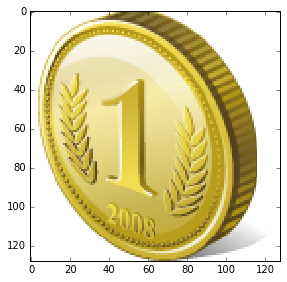

In [14]:
imshow(coin)

In [51]:
small_coin = skimage.img_as_ubyte(transform.rescale(coin, 0.25))

/Users/kappamaki/anaconda/lib/python3.4/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


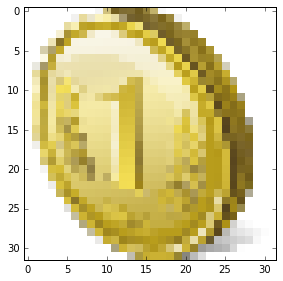

In [52]:
imshow(small_coin)

In [53]:
small_coin.dtype

dtype('uint8')

In [54]:
coin.dtype

dtype('uint8')

In [32]:
def blank_image(shape=(800, 600, 4)):
    "Returns a blank image."
    return np.zeros(shape, dtype=np.uint8)

In [33]:
my_image = blank_image()

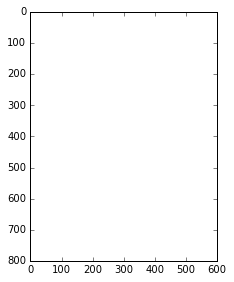

In [34]:
imshow(my_image)

Let's now write a function that inserts another image into our master image.

In [35]:
def insert_pattern(master, pattern, position):
    "Inserts pattern into master image, at given position. Returns new image."
    new_master = master.copy()
    r, c = position
    new_master[r:r+pattern.shape[0],
               c:c+pattern.shape[1], :] = pattern
    return new_master

Let's test this:

/Users/kappamaki/anaconda/lib/python3.4/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


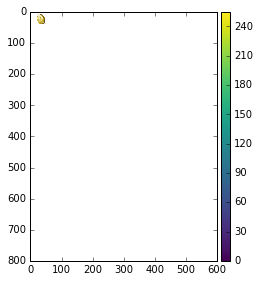

In [55]:
imshow(insert_pattern(my_image, small_coin, (10, 20)))

In [37]:
my_image.shape

(800, 600, 4)

Now that we have the basics going, let's imitate the wikipedia example: three rows of coins, each with its own shift.

In [56]:
coin.shape

(128, 128, 4)

In [74]:
my_image = blank_image(shape=(4 * 128, 800, 4))

Now, let's add the first row with a given spacing.

In [75]:
for i in range(5):
    my_image = insert_pattern(my_image, coin, (10, 10 + (128 + 30) * i))

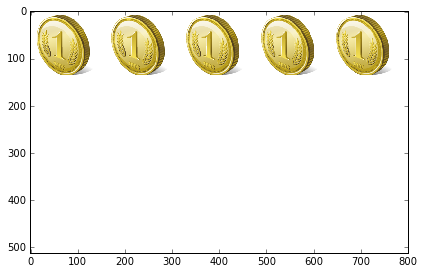

In [76]:
imshow(my_image)

Let's move on to the next two rows:

In [77]:
for i in range(5):
    my_image = insert_pattern(my_image, coin, (10 + 145, 10 + (128 + 20) * i))

In [78]:
for i in range(5):
    my_image = insert_pattern(my_image, coin, (10 + 145 + 145, 10 + (128 + 35) * i))

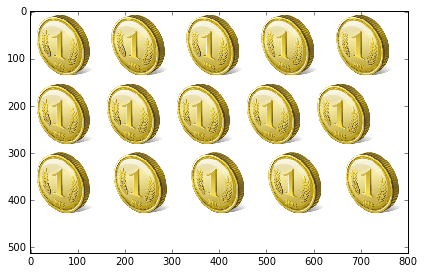

In [79]:
imshow(my_image)

In [85]:
my_image.shape

(512, 800, 4)

In [81]:
from skimage.io import imsave

In [82]:
imsave('files/stereotest.png', my_image)

It works!

Now, the question is: does it work vertically as well?

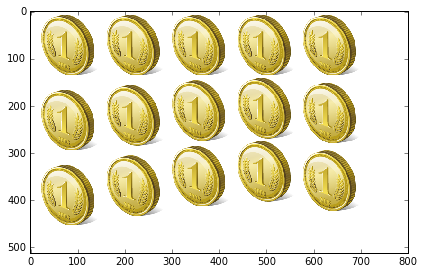

In [106]:
my_image = blank_image(shape=(4 * 128, 800, 4))
for j in range(3):
    my_image = insert_pattern(my_image, coin, (10 + (128 + 30) * j, 20))
    my_image = insert_pattern(my_image, coin, (10 + (128 + 20) * j, 20 + 1*(128+10)))
    my_image = insert_pattern(my_image, coin, (10 + (128 + 10) * j, 20 + 2*(128+10)))
    my_image = insert_pattern(my_image, coin, (10 + (128 + 5) * j, 20 + 3*(128+10)))
    my_image = insert_pattern(my_image, coin, (10 + (128 + 15) * j, 20 + 4*(128+10)))
imshow(my_image)

In [107]:
imsave('files/stereotestvertical.png', my_image)

This one gets 3d because of the pattern, but it hearts the eyes. Furthermore, I cannot achieve any sense of depth.